In [1]:
# List all device
from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [2]:
# Check available GPU
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [3]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";  

In [4]:
# Importing the libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Reshape, Lambda, GRU, BatchNormalization, Bidirectional
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.activations import softmax
from keras.optimizers import SGD, RMSprop
import math
import pickle
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

In [5]:
def calculate_class(returns):
    """Find the class for each LSTM sequence based on the median returns."""
    median_returns = returns.median(axis=1)
    labels = returns.iloc[:, :].apply(lambda x: np.where
                                      (x >= median_returns, 1, 0), axis=0)
    return labels

In [6]:
np.random.seed(2)
x_train = np.random.rand(10,2)
x_train.shape

(10, 2)

In [7]:
y_train = to_categorical(calculate_class(pd.DataFrame(x_train)).values, 2)
y_train.shape

(10, 2, 2)

In [8]:
x_train[0]

array([0.4359949 , 0.02592623])

In [9]:
y_train[0]

array([[0., 1.],
       [1., 0.]], dtype=float32)

In [10]:
timestep = 1
# The second range will be looped first
# x_series = [x_train[i:i+timestep, j] for i in range(x_train.shape[0] - timestep) for j in range(x_train.shape[1])]
# y_series = [y_train[i+timestep, j] for i in range(y_train.shape[0] - timestep) for j in range(y_train.shape[1])]
x_series = [x_train[i:i+timestep, j] for i in range(1, x_train.shape[0] - timestep) for j in range(x_train.shape[1])]
y_series = [y_train[i+timestep, j] for i in range(y_train.shape[0] - timestep - 1) for j in range(y_train.shape[1])]
x = np.array(x_series)
y = np.array(y_series)
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: (16, 1)
y shape: (16, 2)


In [11]:
x = np.reshape(x, (x.shape[0], x.shape[1], 1))
print(f"x shape: {x.shape}")


x shape: (16, 1, 1)


In [12]:
for i in range(x.shape[0]):
    print(x[i], y[i])

[[0.54966248]] [0. 1.]
[[0.43532239]] [1. 0.]
[[0.4203678]] [0. 1.]
[[0.33033482]] [1. 0.]
[[0.20464863]] [1. 0.]
[[0.61927097]] [0. 1.]
[[0.29965467]] [0. 1.]
[[0.26682728]] [1. 0.]
[[0.62113383]] [0. 1.]
[[0.52914209]] [1. 0.]
[[0.13457995]] [1. 0.]
[[0.51357812]] [0. 1.]
[[0.18443987]] [1. 0.]
[[0.78533515]] [0. 1.]
[[0.85397529]] [0. 1.]
[[0.49423684]] [1. 0.]


In [13]:

# expected input data shape: (batch_size, timesteps, data_dim)
regressor = Sequential()

regressor.add(LSTM(units=2, batch_input_shape=(2, timestep, 1), stateful=True))

regressor.add(Dense(2, activation='softmax'))
regressor.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (2, 2)                    32        
_________________________________________________________________
dense_1 (Dense)              (2, 2)                    6         
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [14]:
# result = regressor.fit(x, y, epochs=1000,batch_size=527, validation_split=0.2, shuffle=False, callbacks = [EarlyStopping(monitor='val_loss', mode='min', patience=200),
#              ModelCheckpoint(filepath='../model/LSTM/best_model.h5', monitor='val_acc', save_best_only=True)])
result = regressor.fit(x, y, epochs=1000,batch_size=2, shuffle=False)
# regressor.fit(x, y, epochs=1000,batch_size=500, validation_split=0.2, callbacks = [EarlyStopping(monitor='val_loss', mode='min', patience=20),
#              ModelCheckpoint(filepath='../model/LSTM/best_model.h5', monitor='val_acc', save_best_only=True)])


Epoch 1/1000
16/16 [==============================] - 0s 27ms/step - loss: 0.7005 - acc: 0.5000
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6995 - acc: 0.5000
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6989 - acc: 0.4375
Epoch 4/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6985 - acc: 0.4375
Epoch 5/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6983 - acc: 0.3750
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.6980 - acc: 0.3125
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6978 - acc: 0.2500
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.6975 - acc: 0.2500
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.6973 - acc: 0.2500
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.6970 - acc: 0.2500
Epoch 11/1000
16/16 [===========================

16/16 [==============================] - 0s 1ms/step - loss: 0.6430 - acc: 0.6875
Epoch 171/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.6425 - acc: 0.6875
Epoch 172/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6421 - acc: 0.6875
Epoch 173/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6416 - acc: 0.6875
Epoch 174/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6412 - acc: 0.6875
Epoch 175/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6407 - acc: 0.6875
Epoch 176/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6402 - acc: 0.6875
Epoch 177/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6398 - acc: 0.6875
Epoch 178/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6393 - acc: 0.6875
Epoch 179/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6389 - acc: 0.6875
Epoch 180/1000
16/16 [=======================

16/16 [==============================] - 0s 1ms/step - loss: 0.5754 - acc: 0.7500
Epoch 339/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5751 - acc: 0.7500
Epoch 340/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5748 - acc: 0.7500
Epoch 341/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5745 - acc: 0.7500
Epoch 342/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5742 - acc: 0.7500
Epoch 343/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5740 - acc: 0.7500
Epoch 344/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5737 - acc: 0.7500
Epoch 345/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5734 - acc: 0.7500
Epoch 346/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5732 - acc: 0.7500
Epoch 347/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5729 - acc: 0.7500
Epoch 348/1000
16/16 [=======================

16/16 [==============================] - 0s 2ms/step - loss: 0.5530 - acc: 0.7500
Epoch 507/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5529 - acc: 0.7500
Epoch 508/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5529 - acc: 0.7500
Epoch 509/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5529 - acc: 0.7500
Epoch 510/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5529 - acc: 0.7500
Epoch 511/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5529 - acc: 0.7500
Epoch 512/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5528 - acc: 0.7500
Epoch 513/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5528 - acc: 0.7500
Epoch 514/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5528 - acc: 0.7500
Epoch 515/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5528 - acc: 0.7500
Epoch 516/1000
16/16 [=======================

16/16 [==============================] - 0s 1ms/step - loss: 0.5527 - acc: 0.7500
Epoch 675/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5527 - acc: 0.7500
Epoch 676/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5527 - acc: 0.7500
Epoch 677/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5527 - acc: 0.7500
Epoch 678/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5526 - acc: 0.7500
Epoch 679/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5526 - acc: 0.7500
Epoch 680/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5526 - acc: 0.7500
Epoch 681/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5526 - acc: 0.7500
Epoch 682/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5526 - acc: 0.7500
Epoch 683/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5526 - acc: 0.7500
Epoch 684/1000
16/16 [=======================

16/16 [==============================] - 0s 1ms/step - loss: 0.5503 - acc: 0.7500
Epoch 843/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5503 - acc: 0.7500
Epoch 844/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5502 - acc: 0.7500
Epoch 845/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5502 - acc: 0.7500
Epoch 846/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5502 - acc: 0.7500
Epoch 847/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5501 - acc: 0.7500
Epoch 848/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5501 - acc: 0.7500
Epoch 849/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5501 - acc: 0.7500
Epoch 850/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5501 - acc: 0.7500
Epoch 851/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5500 - acc: 0.7500
Epoch 852/1000
16/16 [=======================

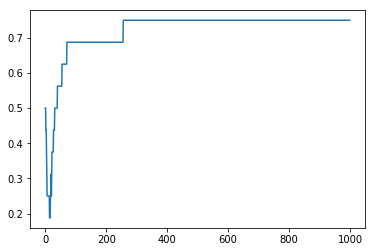

In [15]:
# plt.plot(result.history["val_acc"])
plt.plot(result.history["acc"])

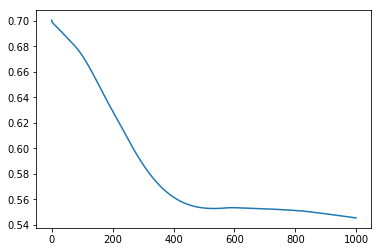

In [16]:
# plt.plot(result.history["val_loss"])
plt.plot(result.history["loss"])

In [17]:
regressor2 = Sequential()
regressor2.add(LSTM(units=2, batch_input_shape=(2, timestep, 1), stateful=False))

regressor2.add(Dense(2, activation='softmax'))
regressor2.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
regressor2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (2, 2)                    32        
_________________________________________________________________
dense_2 (Dense)              (2, 2)                    6         
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [18]:
result2 = regressor2.fit(x, y, epochs=1000,batch_size=2)


Epoch 1/1000
16/16 [==============================] - 0s 20ms/step - loss: 0.6939 - acc: 0.2500
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6936 - acc: 0.3750
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6933 - acc: 0.3750
Epoch 4/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6935 - acc: 0.3750
Epoch 5/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6934 - acc: 0.3750
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.6935 - acc: 0.5000
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6932 - acc: 0.4375
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.6933 - acc: 0.5000
Epoch 9/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6934 - acc: 0.4375
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.6929 - acc: 0.5000
Epoch 11/1000
16/16 [===========================

16/16 [==============================] - 0s 1ms/step - loss: 0.6533 - acc: 0.7500
Epoch 171/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6530 - acc: 0.6875
Epoch 172/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6522 - acc: 0.7500
Epoch 173/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6517 - acc: 0.6875
Epoch 174/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.6512 - acc: 0.7500
Epoch 175/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6510 - acc: 0.6875
Epoch 176/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6503 - acc: 0.6875
Epoch 177/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6498 - acc: 0.6875
Epoch 178/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6490 - acc: 0.7500
Epoch 179/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.6490 - acc: 0.7500
Epoch 180/1000
16/16 [=======================

16/16 [==============================] - 0s 1ms/step - loss: 0.5491 - acc: 0.7500
Epoch 339/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5472 - acc: 0.7500
Epoch 340/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5474 - acc: 0.7500
Epoch 341/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5461 - acc: 0.7500
Epoch 342/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5453 - acc: 0.7500
Epoch 343/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5450 - acc: 0.7500
Epoch 344/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5438 - acc: 0.7500
Epoch 345/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5438 - acc: 0.6875
Epoch 346/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5424 - acc: 0.7500
Epoch 347/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5418 - acc: 0.7500
Epoch 348/1000
16/16 [=======================

16/16 [==============================] - 0s 1ms/step - loss: 0.4697 - acc: 0.7500
Epoch 507/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4697 - acc: 0.7500
Epoch 508/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4694 - acc: 0.7500
Epoch 509/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4685 - acc: 0.7500
Epoch 510/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4688 - acc: 0.7500
Epoch 511/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4680 - acc: 0.7500
Epoch 512/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4683 - acc: 0.7500
Epoch 513/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4673 - acc: 0.7500
Epoch 514/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4678 - acc: 0.7500
Epoch 515/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4686 - acc: 0.7500
Epoch 516/1000
16/16 [=======================

16/16 [==============================] - 0s 1ms/step - loss: 0.4495 - acc: 0.7500
Epoch 675/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4501 - acc: 0.7500
Epoch 676/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4496 - acc: 0.7500
Epoch 677/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4504 - acc: 0.7500
Epoch 678/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4492 - acc: 0.7500
Epoch 679/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4482 - acc: 0.7500
Epoch 680/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4488 - acc: 0.7500
Epoch 681/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4490 - acc: 0.7500
Epoch 682/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4496 - acc: 0.7500
Epoch 683/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4498 - acc: 0.7500
Epoch 684/1000
16/16 [=======================

16/16 [==============================] - 0s 2ms/step - loss: 0.4448 - acc: 0.7500
Epoch 843/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4445 - acc: 0.7500
Epoch 844/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4450 - acc: 0.7500
Epoch 845/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4437 - acc: 0.7500
Epoch 846/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4448 - acc: 0.7500
Epoch 847/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4446 - acc: 0.7500
Epoch 848/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4449 - acc: 0.7500
Epoch 849/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4447 - acc: 0.7500
Epoch 850/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4440 - acc: 0.7500
Epoch 851/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4446 - acc: 0.7500
Epoch 852/1000
16/16 [=======================

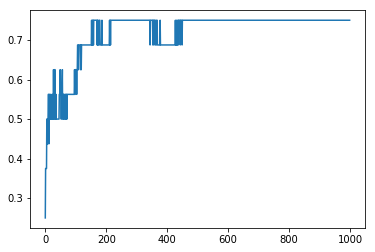

In [19]:
plt.plot(result2.history["acc"])

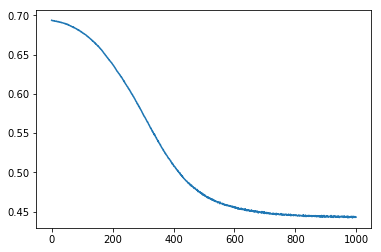

In [20]:
plt.plot(result2.history["loss"])

In [12]:
x_dense = np.array(x_series)

In [13]:
regressor3 = Sequential()
regressor3.add(Dense(10, input_shape=(timestep, )))

regressor3.add(Dense(2, activation='softmax'))
regressor3.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
regressor3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [14]:
x_dense.shape

(16, 1)

In [15]:
y.shape

(16, 2)

In [16]:
result3 = regressor3.fit(x_dense, y, epochs=100,batch_size=2)


Epoch 1/100
16/16 [==============================] - 0s 16ms/step - loss: 0.6817 - acc: 0.5000
Epoch 2/100
16/16 [==============================] - 0s 766us/step - loss: 0.6803 - acc: 0.5000
Epoch 3/100
16/16 [==============================] - 0s 839us/step - loss: 0.6780 - acc: 0.5000
Epoch 4/100
16/16 [==============================] - 0s 764us/step - loss: 0.6772 - acc: 0.5000
Epoch 5/100
16/16 [==============================] - 0s 784us/step - loss: 0.6761 - acc: 0.5000
Epoch 6/100
16/16 [==============================] - 0s 836us/step - loss: 0.6734 - acc: 0.5000
Epoch 7/100
16/16 [==============================] - 0s 909us/step - loss: 0.6712 - acc: 0.5000
Epoch 8/100
16/16 [==============================] - 0s 943us/step - loss: 0.6711 - acc: 0.5625
Epoch 9/100
16/16 [==============================] - 0s 804us/step - loss: 0.6695 - acc: 0.5000
Epoch 10/100
16/16 [==============================] - 0s 816us/step - loss: 0.6682 - acc: 0.5625
Epoch 11/100
16/16 [====================

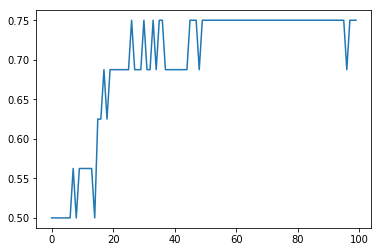

In [17]:
plt.plot(result3.history["acc"])

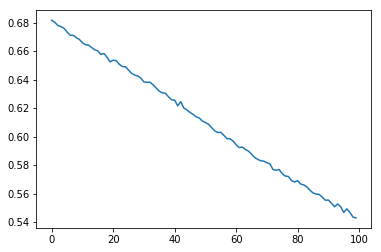

In [18]:
plt.plot(result3.history["loss"])